In [27]:
# KNN Classification
from pandas import read_csv
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [28]:
# Load the Iris dataset
from sklearn.datasets import load_iris
import pandas as pd

# Load iris dataset
iris = load_iris()
X = iris.data
Y = iris.target

# Create a dataframe for better visualization
dataframe = pd.DataFrame(X, columns=iris.feature_names)
dataframe['class'] = Y

print("Dataset shape:", X.shape)
print("Number of classes:", len(iris.target_names))
print("Class names:", iris.target_names)

Dataset shape: (150, 4)
Number of classes: 3
Class names: ['setosa' 'versicolor' 'virginica']


In [29]:
# Train-Test Split
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2, random_state=42)

print("Training set shape:", xtrain.shape)
print("Testing set shape:", xtest.shape)
print("Training target shape:", ytrain.shape)
print("Testing target shape:", ytest.shape)

Training set shape: (120, 4)
Testing set shape: (30, 4)
Training target shape: (120,)
Testing target shape: (30,)


In [30]:
# Train KNN model on training data
from sklearn.metrics import accuracy_score, classification_report

# Create and train KNN model
knn_model = KNeighborsClassifier(n_neighbors=6)  # Using optimal k from grid search
knn_model.fit(xtrain, ytrain)

# Make predictions on test set
y_pred = knn_model.predict(xtest)

# Evaluate the model
test_accuracy = accuracy_score(ytest, y_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(ytest, y_pred, target_names=iris.target_names))

Test Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [31]:
dataframe

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [32]:
num_folds = 10
kfold = KFold(n_splits=10)

In [33]:
model = KNeighborsClassifier(n_neighbors=15)
results = cross_val_score(model, X, Y, cv=kfold)

In [34]:
print(results.mean())

0.9266666666666667


### Grid Search for Algorithm Tuning

In [35]:
# Grid Search for Algorithm Tuning
import numpy
from pandas import read_csv
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [36]:
# Using the same Iris dataset for grid search
# X and Y are already loaded from the previous cell
print("Using Iris dataset for Grid Search")
print("Features shape:", X.shape)
print("Target shape:", Y.shape)

Using Iris dataset for Grid Search
Features shape: (150, 4)
Target shape: (150,)


In [37]:
n_neighbors = numpy.array(range(1,40))
param_grid = dict(n_neighbors=n_neighbors)

In [38]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X, Y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [39]:
print(grid.best_score_)
print(grid.best_params_)

0.9800000000000001
{'n_neighbors': np.int64(6)}


### Visualizing the CV results

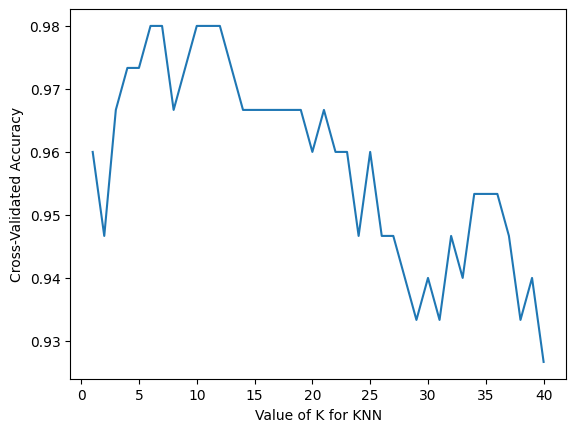

In [40]:
import matplotlib.pyplot as plt 
%matplotlib inline
# choose k between 1 to 41
k_range = range(1, 41)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, Y, cv=5)
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()